# Agrupamento com Fuzzy c-means

- Agrupamento parcial difuso
- Um registro pode estar dentro de mais de um grupo
- É gerada uma probabilidade para cada grupo
- Artigo: https://www.sciencedirect.com/science/article/pii/0098300484900207

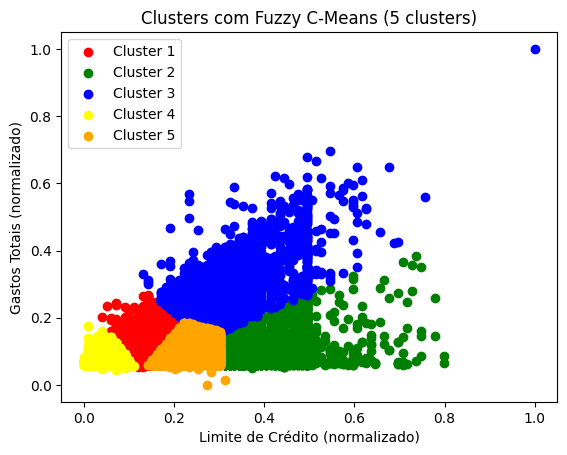

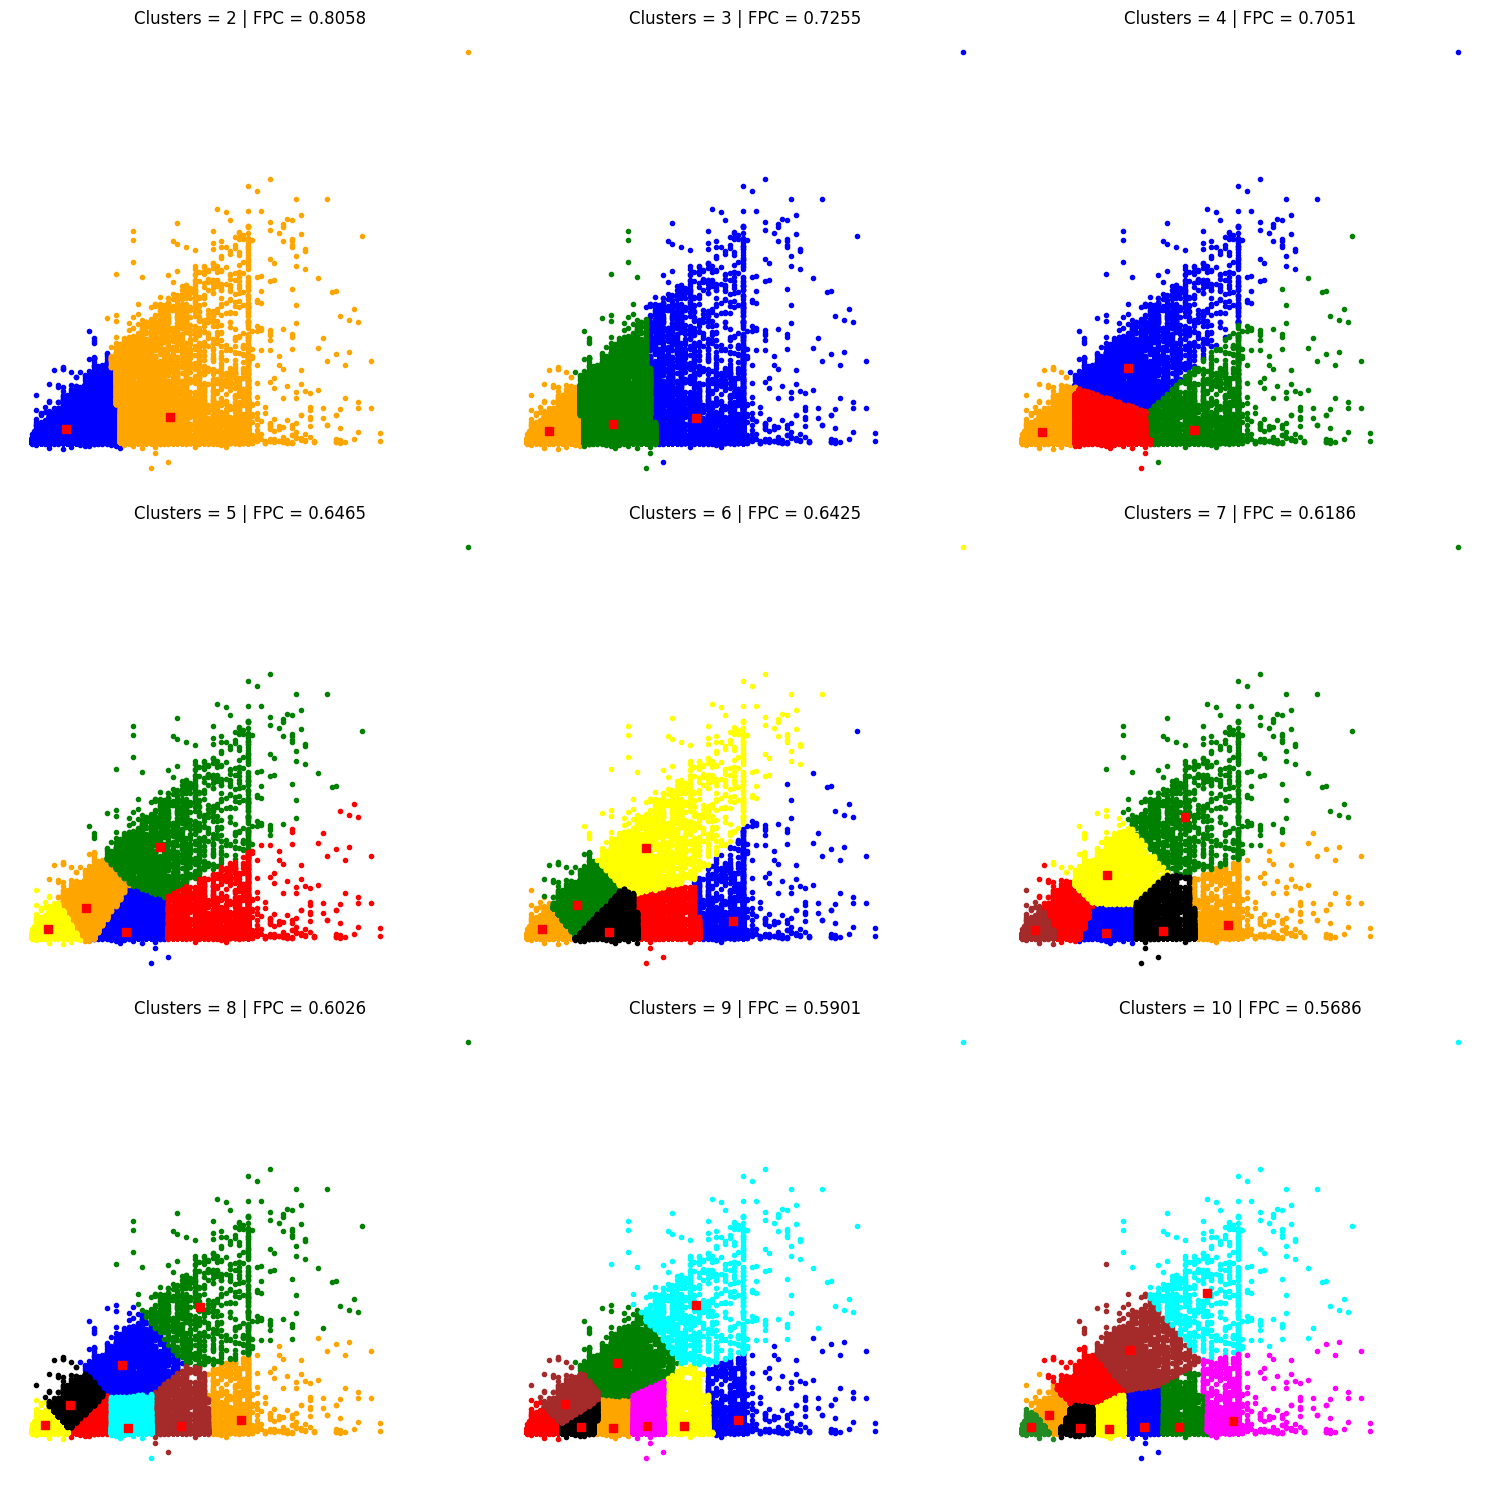

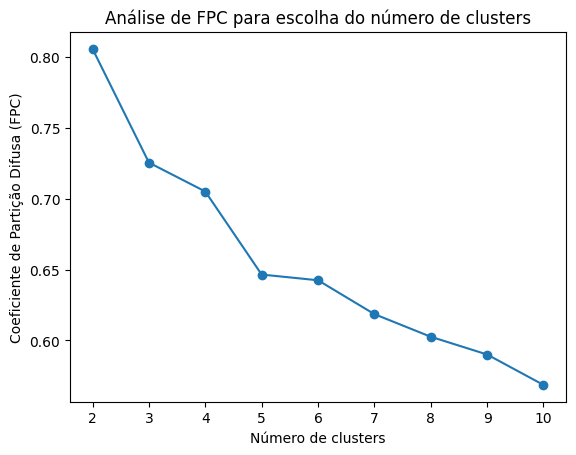

In [ ]:
# ----------------------------
# IMPORTAÇÕES NECESSÁRIAS
# ----------------------------

import skfuzzy                     # Biblioteca de lógica fuzzy (clustering Fuzzy c-means)
import pandas as pd                # Para carregar e manipular a base de dados tabular
from sklearn.preprocessing import MinMaxScaler  # Para normalizar os dados numéricos
import matplotlib.pyplot as plt    # Para geração de gráficos
import numpy as np                 # Para operações numéricas e vetoriais

# ----------------------------
#    CARREGAMENTO DA BASE DE DADOS
# ----------------------------
# Lê o arquivo CSV contendo informações de clientes de cartão de crédito.
# O argumento header=1 indica que a primeira linha contém nomes de coluna, mas pula a primeira linha (linha zero).
base = pd.read_csv('credit_card_clients.csv', header=1)
# Cria uma nova coluna chamada 'BILL TOTAL' com a soma das seis faturas mensais do cliente.
base['BILL TOTAL'] = (base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6'])

# ----------------------------
#    PRÉ-PROCESSAMENTO E NORMALIZAÇÃO
# ----------------------------
# Seleciona duas variáveis para clusterização: [1] é 'LIMIT_BAL' (limite de crédito) e [25] é 'BILL TOTAL' (soma das faturas)
X = base.iloc[:, [1, 25]].values
scaler = MinMaxScaler() # Normaliza os dados para o intervalo [0, 1] usando Min-Max Scaling.
X = scaler.fit_transform(X) # É uma prática essencial para clustering, evitando influência de escalas diferentes.

# ----------------------------
#    CLUSTERIZAÇÃO COM FUZZY C-MEANS (EXEMPLO FIXO COM 5 CLUSTERS)
# ----------------------------
previsoes_inicial = skfuzzy.cmeans( # Executa Fuzzy C-Means com:
    data=X.T, 
    c=5, # c = 5 clusters
    m=2, # m = 2 (grau de fuzziness)
    error=0.005, # error = 0.005 (critério de parada)
    maxiter=1000, # maxiter = 1000 (máximo de iterações)
    init=None) # init = None (inicializa com centroides aleatórios)
# Obtém o rótulo do cluster mais provável para cada ponto. Cada ponto tem um grau de pertencimento para cada cluster.
previsoes_labels = previsoes_inicial[1].argmax(axis=0) # 'argmax' escolhe o cluster com maior pertencimento.

# ----------------------------
#    VISUALIZAÇÃO DOS 5 CLUSTERS (EXEMPLO MANUAL)
# ----------------------------
cores_iniciais = ['red', 'green', 'blue', 'yellow', 'orange'] # Define cores para cada cluster.
for i in range(5): # Plota cada cluster com uma cor diferente.
    plt.scatter(
        X[previsoes_labels == i, 0],  # eixo x: LIMIT_BAL normalizado
        X[previsoes_labels == i, 1],  # eixo y: BILL TOTAL normalizado
        color=cores_iniciais[i], label=f'Cluster {i+1}')
# Configurações do gráfico.
plt.xlabel('Limite de Crédito (normalizado)')
plt.ylabel('Gastos Totais (normalizado)')
plt.title('Clusters com Fuzzy C-Means (5 clusters)')
plt.legend()
plt.show()

# ----------------------------
#     ANÁLISE DO NÚMERO IDEAL DE CLUSTERS
# ----------------------------
colors = ['blue', 'orange', 'green', 'red', 'yellow', 'black', 'brown', 'cyan', 'magenta', 'forestgreen'] # Lista de cores disponíveis (para até 10 clusters diferentes)
fig, axes = plt.subplots(3, 3, figsize=(15, 15)) # Cria uma grade de subplots (3x3) para testar de 2 a 10 clusters.
# Lista para armazenar o FPC (Fuzzy Partition Coefficient) de cada teste.
fpcs = [] # O FPC mede a qualidade do agrupamento fuzzy: varia de 0 a 1, quanto maior, melhor separação.
n_clusters_range = list(range(2, 11)) # Define intervalo de clusters a testar: de 2 a 10.
for n_clusters, ax in zip(n_clusters_range, axes.reshape(-1)): # Loop: para cada número de clusters, gera o agrupamento e plota.
    centroides, previsoes, _, _, _, _, fpc = skfuzzy.cmeans(data=X.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None) # Executa o Fuzzy C-Means para o número atual de clusters.
    fpcs.append(fpc)
    labels = np.argmax(previsoes, axis=0) # Converte graus de pertencimento em rótulo de cluster mais provável.
    for i in range(n_clusters): # Plota cada cluster com cor diferente.
        ax.plot(X[labels == i, 0], X[labels == i, 1], '.', color=colors[i % len(colors)])
    for centro in centroides: # Plota os centroides em vermelho com símbolo 's' (quadrado)
        ax.plot(centro[0], centro[1], 'rs')
    ax.set_title(f'Clusters = {n_clusters} | FPC = {fpc:.4f}') # Título com número de clusters e FPC calculado.
    ax.axis('off')  # Remove eixos para visualização limpa.
plt.tight_layout()

# ----------------------------
#     GRÁFICO DO FPC
# ----------------------------
fig, ax = plt.subplots() # Cria gráfico final mostrando como o FPC varia com o número de clusters.
ax.plot(n_clusters_range, fpcs, marker='o')
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Coeficiente de Partição Difusa (FPC)')
ax.set_title('Análise de FPC para escolha do número de clusters')
plt.show()

# Novo agrupamento com FPC - análise do agrupamento

          Limite         Gastos
0   86983.608322  197615.214136
1  322873.390240  347907.485179
          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1       

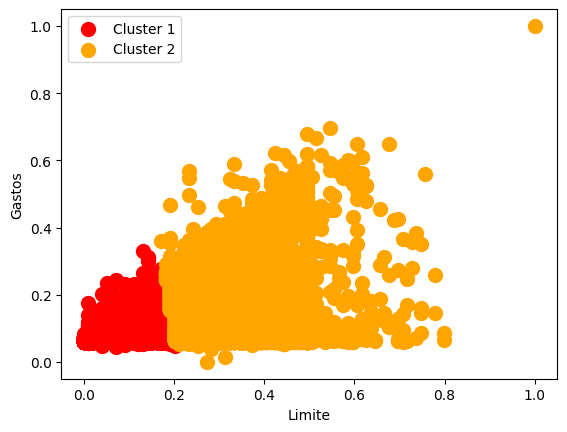

In [23]:
# ----------------------------
#    EXECUTA O FUZZY C-MEANS PARA 2 CLUSTERS
# ----------------------------
agrupamento = skfuzzy.cmeans( # Aplica o algoritmo Fuzzy C-Means:
    data=X.T, # data = X.T: transposição necessária pois o skfuzzy espera variáveis em linhas e amostras em colunas.
    c=2, # c = 2: define que queremos 2 clusters.
    m=2, # m = 2: grau de fuzziness, controla quão difusa é a separação.
    error=0.005, # error = 0.005: critério de tolerância para convergência.
    maxiter=1000, # maxiter = 1000: máximo de iterações para alcançar a convergência.
    init=None) # init = None: inicializa centroides aleatórios.

# ----------------------------
#    OBTÉM AS PERTINÊNCIAS E RÓTULOS DOMINANTES
# ----------------------------
previsoes_porcentagem = agrupamento[1] # 'agrupamento[1]' contém a matriz de pertinências: Cada linha: um cluster. Cada coluna: um cliente/observação.
previsoes = previsoes_porcentagem.argmax(axis=0) # 'previsoes' armazena o índice do cluster com maior pertinência para cada ponto. Assim, transforma o resultado fuzzy em rótulos hard (clássicos).
previsoes, np.unique(previsoes, return_counts=True) # Mostra os rótulos obtidos e quantos pontos tem em cada cluster.

# ----------------------------
#    VISUALIZA OS CLUSTERS ENCONTRADOS
# ----------------------------
plt.scatter( # Plota o Cluster 1 (pontos onde previsoes == 0) em vermelho, com tamanho de ponto ajustado.
    X[previsoes == 0, 0],  # eixo X: Limite normalizado
    X[previsoes == 0, 1],  # eixo Y: Gastos normalizados
    s=100,                  # tamanho do marcador
    c='red',                # cor
    label='Cluster 1')       # legenda
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s=100, c='orange', label='Cluster 2') # Plota o Cluster 2 (pontos onde previsoes == 1) em laranja.
plt.xlabel('Limite') # Define rótulos dos eixos.
plt.ylabel('Gastos')
plt.legend() # Adiciona a legenda para distinguir clusters.

# ----------------------------
#    OBTÉM E DESNORMALIZA OS CENTRÓIDES
# ----------------------------
centroides = agrupamento[0] # 'agrupamento[0]' contém os centroides no espaço normalizado.
centroides = scaler.inverse_transform(centroides) # Aplica a transformação inversa do MinMaxScaler para retornar aos valores reais.
centroides = pd.DataFrame(data=centroides, columns=['Limite', 'Gastos']) # Organiza os centroides em um DataFrame com nomes de colunas apropriados.
print(centroides)
# ----------------------------
#     ANEXA OS RÓTULOS DE CLUSTER À BASE ORIGINAL
# ----------------------------
# Cria um DataFrame com os rótulos de cluster.
base_grupos = pd.concat([base, pd.DataFrame({'grupo': previsoes})], axis=1) # Junta com a base original para facilitar análise ou exportação.
print(base_grupos)

# Teoria do FPC:

FPC significa Fuzzy Partition Coefficient, ou em português, Coeficiente de Partição Difusa.
É um índice que mede a qualidade do agrupamento fuzzy.

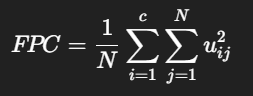

N = número de amostras.

c = número de clusters.

u₍ᵢⱼ₎ = grau de pertinência do ponto j no cluster i.

Ou seja:

* Ele eleva ao quadrado os graus de pertinência e faz a média.

* Se os graus de pertinência são extremos (próximos de 0 ou 1), o FPC é alto.

* Se os graus de pertinência são intermediários (muita incerteza), o FPC é mais baixo.

Próximo de 1	Clusters bem definidos (pouca sobreposição)
Próximo de 0	Clusters muito sobrepostos (difusos)